# Life Expectancy and GDP Project

In this project, the life expectancy and GDP of various countries will be analyzed through the use of plots and visualisations.

  The data is supplied by Codecademy from the original sources:
  - GDP: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
  - Life expectancy: [World Health Organization](http://apps.who.int/gho/data/node.main.688).

Some example questions to answer in this project:
* Has life expectancy increased over time across each nation?
* Has GDP increased over time across each nation?
* Is there a correlation between GDP and life expectancy of a country?
* What is the average life expectancy across each nation?

To begin, all necessary libraries are imported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

Now we need to import the data into Python, we can do this easily using the `pandas` library whose `DataFrame` object will allow analysis of the data to be performed much more easily.

In [2]:
legdp_data = pd.read_csv("all_data.csv")

legdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [3]:
legdp_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


From some preliminary exploration of the dataset, we can see its shape, what columns are present and the fact that no data appears to be missing.  

By visually inspecting the dataset using `.head()` we can also see the dataset's contents.  

From this however we can see that one column differs greatly from the rest.  
Whereas most are single word column names, `Life expectancy at birth (years)` is five and will also be very unweildly in its current state hence we will rename it to an acronym similar to `GDP`.

In [4]:
legdp_data.rename(columns={'Life expectancy at birth (years)': 'LEAB'}, inplace=True)
legdp_data.head()

,Country,Year,LEAB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Now that we have looked at the dataset as a whole, we can look into specific variables.  
Of the present variables, the ones to look further at before plotting will be `Country` and `Year`.  

We can make use of the `pandas.DataFrame.unique()` method to easily look at the range of countries and years that the dataset includes

In [5]:
print(legdp_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [6]:
print(legdp_data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Now we can see exactly which countries are present in the dataset and over what years the data has been collected.  
With this we can now begin exploring the datas' features visually.

We begin by plotting a bar chart for the averages of `GDP` and `LEAB` across each of the six countries, by using Seaborns' `barplot` function, we do not need to calculate the average of these variables as the aggregate statistic is automatically from the `DataFrame`.

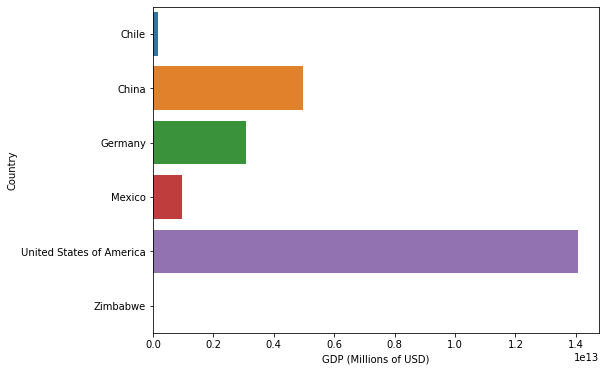

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(data=legdp_data, x='GDP', y='Country', ci=None)
plt.xlabel('GDP (Millions of USD)')
plt.show()

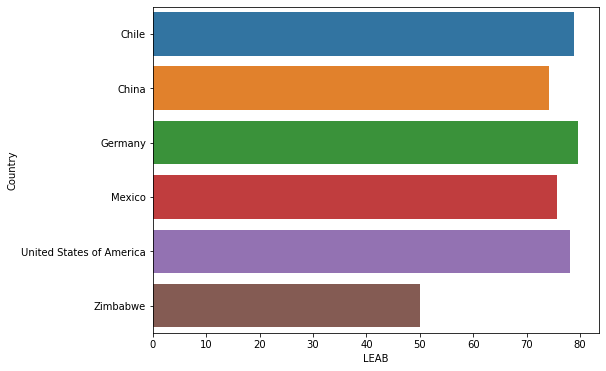

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(data=legdp_data, x='LEAB', y='Country', ci=None)
plt.show()

From the above plots we can see that the United States had a significantly higher average `GDP` across the years 2004-2016 and that the average `GDP` of Zimbabwe is not visible on the plot. Chile is only slightly more visable while comparatively the remaining countries are much more comparable.  

From the life expectancy plot we can see that the average `LEAB` of most countries in the years 2000-2016 lies from mid-to-high seventies while the average life expectancy in Zimbabwe between the same period is around fifty.

We can obtain precise values directly from the `DataFrame`

In [9]:
legdp_data.groupby('Country').LEAB.mean()

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: LEAB, dtype: float64

As we have time series data, a line plot is one of the most common and simplest methods of visualisation.  
By plotting the values of `GDP` and `LEAB` by country across each year we can see how both changed over the period.

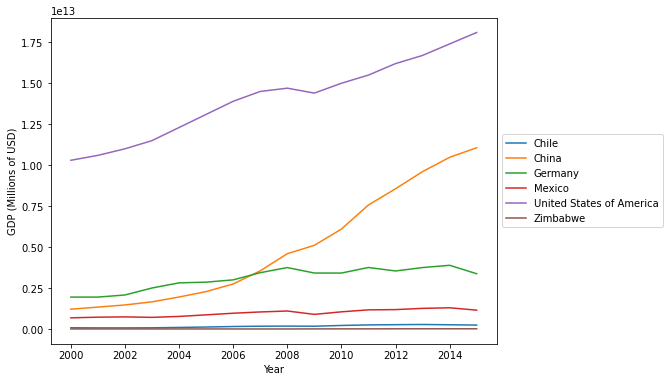

In [10]:
plt.figure(figsize=(8,6))
sns.lineplot(data=legdp_data, x='Year', y='GDP', hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP (Millions of USD)')
plt.show()

Here we can see that for the United States, China and Germany, the `GDP` of each increased on the whole over the sixteen year period, unfortunately the scale is too broad for the other countries growth to be commented on.  
To counteract this we instead plot each country individually.

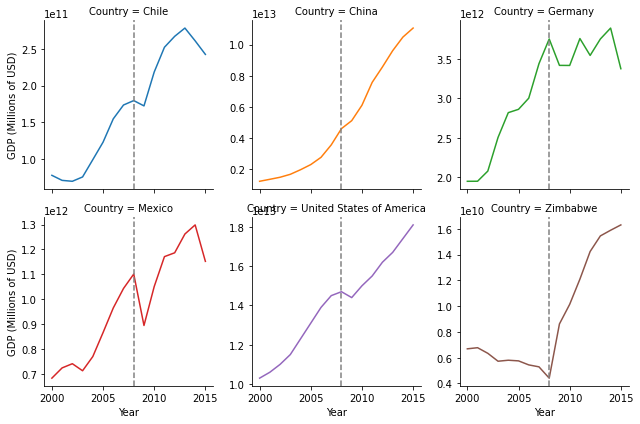

In [11]:
gridGDP = sns.FacetGrid(legdp_data, col='Country', col_wrap=3, sharey=False, hue='Country')
gridGDP.map(sns.lineplot, 'Year', 'GDP').set_axis_labels('Year', 'GDP (Millions of USD)')
gridGDP.refline(x=2008)
plt.show()

Here each plot has been marked to coincide with the 2008 financial crisis.  

We can see that over the period, each country did in fact see growth in GDP.  
We can also see which countries were affected by the 2008 financial crisis with Mexico in particular being negatively affected whereas the GDP of China was largely unaffected by the global crisis.  

Where most countries saw a decrease or decline in growth of GDP, Zimbabwe in fact had its largest growth in the subsequent years from the crisis as this time conincided with the [local governments attempt to combat hyperinflation](http://news.bbc.co.uk/1/hi/world/africa/7859033.stm).

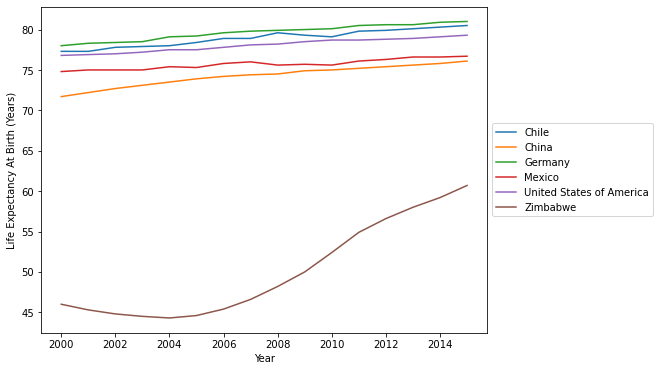

In [12]:
plt.figure(figsize=(8,6))
sns.lineplot(data=legdp_data, x='Year', y='LEAB', hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life Expectancy At Birth (Years)')
plt.show()

From the above plot we can see that over the entire period, each nation saw an increase in life expectancy  
To better see the growth, we plot each nation individually

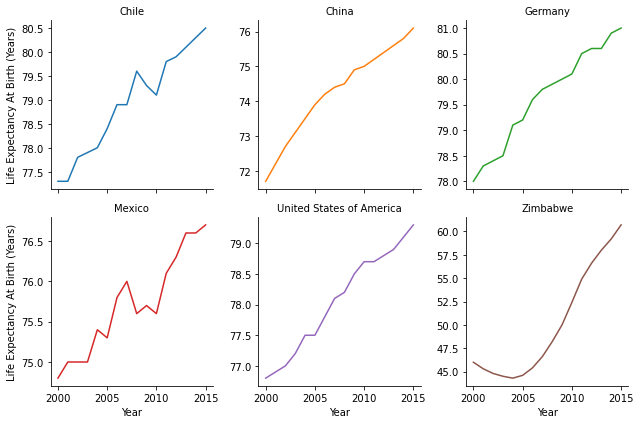

In [13]:
gridLEAB = sns.FacetGrid(data=legdp_data, col='Country', col_wrap=3, sharey=False, hue='Country')
gridLEAB.map(sns.lineplot, 'Year', 'LEAB').set_axis_labels('Year', 'Life Expectancy At Birth (Years)')
gridLEAB.set_titles(col_template='{col_name}')
plt.show()

By allowing each plot to be have an independant axis, we can see individual growth more clearly  
Although at relatively lower values over the period, we can see that Zimbabwe saw the largest increase of approximately 15 years over the period compared to the 2-4 year increase of other nations  

Next we will plot `GDP` against `LEAB` in scatter plot and look at the link between the two

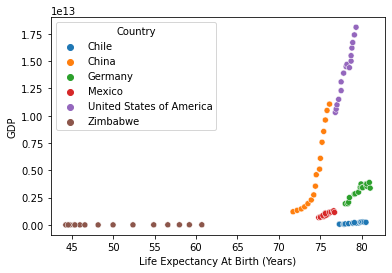

In [14]:
sns.scatterplot(data=legdp_data, x='LEAB', y='GDP', hue='Country')
plt.xlabel('Life Expectancy At Birth (Years)')
plt.show()

Following from previous plots, Zimbabwes lower `GDP` causes it to skew the data  
Despite this we can still see that across the other nations, as `LEAB` increased, so did the `GDP` but to various degrees  
We can explore the the relationship between `GDP` and `LEAB` on a per nation basis

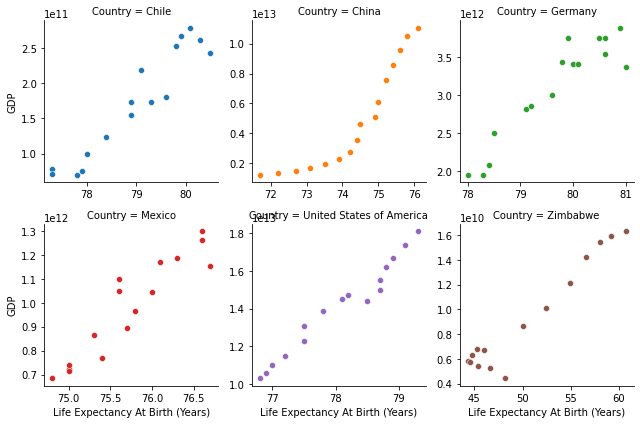

In [15]:
gridLEABGDP = sns.FacetGrid(data=legdp_data, col='Country', hue='Country', sharey=False, sharex=False, col_wrap=3)
gridLEABGDP.map(sns.scatterplot, 'LEAB', 'GDP').set_axis_labels('Life Expectancy At Birth (Years)', 'GDP')
plt.show()

By looking at each nation we can see that overall, an increase in `GDP` led to an increase in `LEAB`  
For the most part the relationships seem linear however China is noticably different, being potentially exponential over the period  

We can use Pearson correlation to quantify linear association between variables in addition to seeing relationships visually

In [16]:
cor, p = pearsonr(legdp_data.GDP, legdp_data.LEAB)
print(cor)

0.343206748449156


If we use all the data, a correlation value of ~0.3 indicates that there is a positive linear association between the variables

In [17]:
for nation in legdp_data.Country.unique():
    nation_data = legdp_data[legdp_data.Country == nation]
    corr, p = pearsonr(nation_data.GDP, nation_data.LEAB)
    print(f'Correlation between GDP and LEAB for {nation}: {corr}')

Correlation between GDP and LEAB for Chile: 0.9498766659254416
Correlation between GDP and LEAB for China: 0.9085255408648358
Correlation between GDP and LEAB for Germany: 0.9326988982561268
Correlation between GDP and LEAB for Mexico: 0.9322377167847081
Correlation between GDP and LEAB for United States of America: 0.9817092382430257
Correlation between GDP and LEAB for Zimbabwe: 0.9661998955858777


When we consider each nation individually, we can see that correlation increases dramatically 
In this case, there is a very strong linear correlation between `GDP` and `LEAB`  
By comparing these values to the graphs, we can see that the United States has the greateast Pearson correlation and is the most linear relationship  
China on the other hand has the lowest value but as we can see the relationship is non-linear over the period

## Conclusion

Although the dataset was fairly small, there were many visualisations that could be created and subsequently analysed  
All the initial questions have been answered:
* All nations saw an increase to GDP and life expectancy over the period
* Each nation saw a strong positive association between GDP and life expectancy
* The average life expectancy for Zimbabwe was 50 years whereas the others were within the 70s

This project led to interesting research, in particular into Zimbabwe and the efforts of the local government to improve the nation's economy  

Further research could be done into the relationship between GDP and life expectancy in China 